# **Team 9**

In [ ]:
# importing directories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the entire dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head() #Data to be tested

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
sample_submission.head() #final output format

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [6]:
#creating submission file and storing Item_Identifier and Outlet_Identifier values to it.
submission = pd.DataFrame(test[['Item_Identifier','Outlet_Identifier']])
submission.head()

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027


# **EDA**

In [7]:
train.shape

(8523, 12)

In [8]:
test.shape

(5681, 11)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


The output is the only feature absent in the test set is the  Item_Outlet_Sales which is the feature to predict

In [11]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
train.describe(exclude=np.number)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

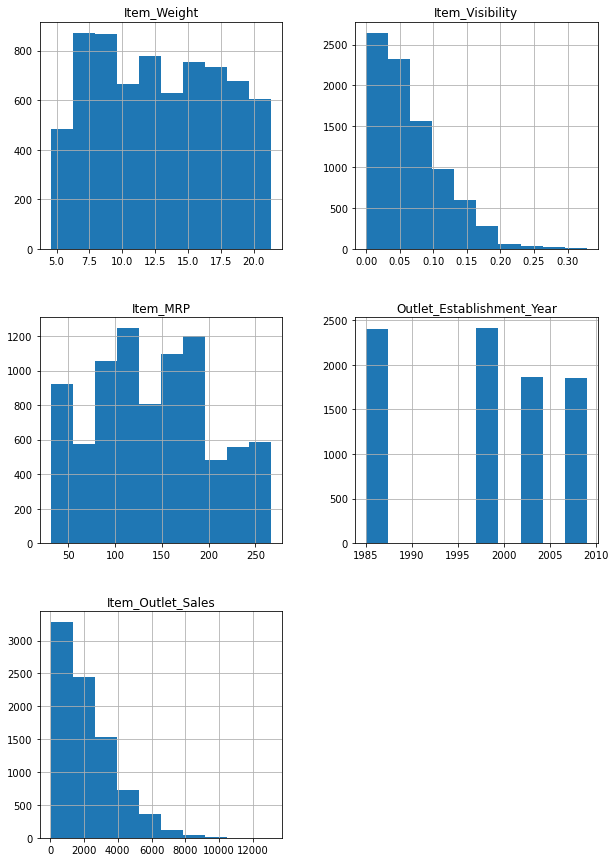

In [13]:
# histogram of train set
train.hist(figsize=(10,15))

Item_Outlet_Sales and Item_Visibility are the two features showing a slightly skewed respone. But on obseving the other features its eveident that these features are displaying the true data rather than a skew.

In [14]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
num = train.select_dtypes(exclude = object)
num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [16]:
obj = train.select_dtypes(include = object)
obj

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


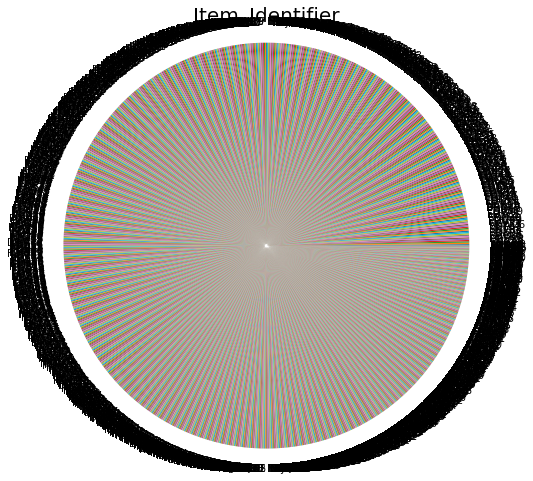

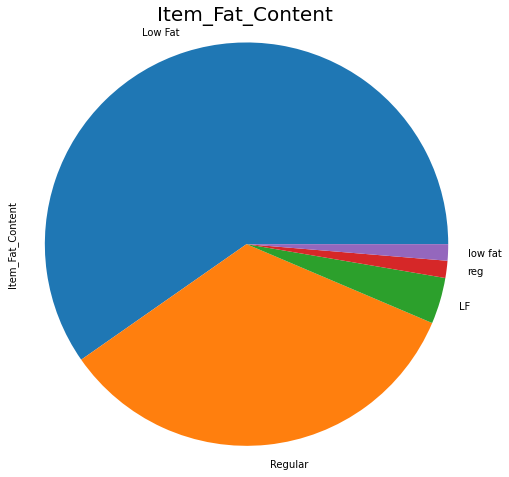

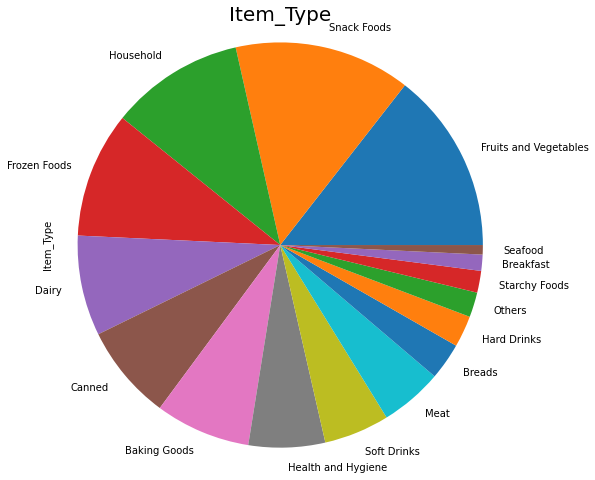

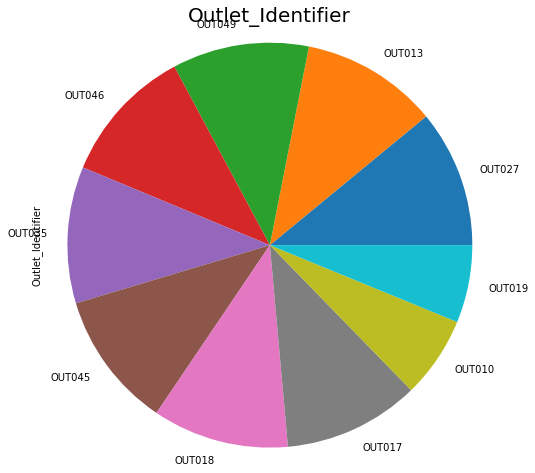

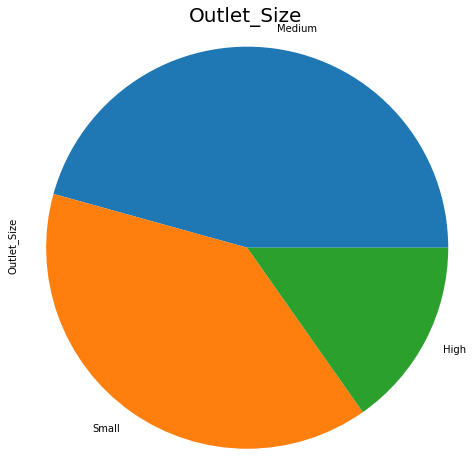

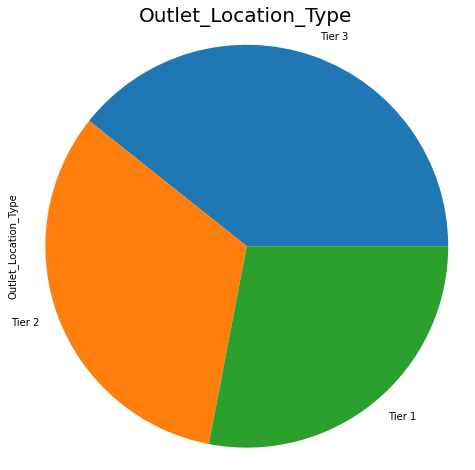

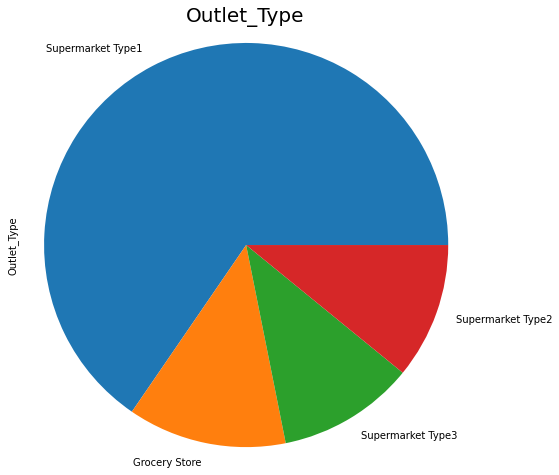

In [17]:
# Plotting the Pie Chart for the train set of data
for column in obj.columns:
  plt.figure(figsize=(8, 8))
  train[column].value_counts().plot(kind='pie')
  plt.title(column,size=20)
  plt.axis('equal')

Form the Pie Chart we can see the following:
1.  Item_Identifier shows the pie chart for all the 1559 unique values.
2. Item_Fat_Content is actually only 2 variables Low_Fat and Regular. All the rest are just different labels for the same.

<AxesSubplot:>

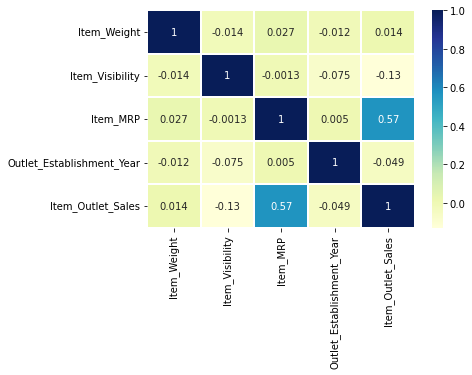

In [18]:
# checking for the correlation between features
correlation = train.corr()
sns.heatmap(correlation,cmap="YlGnBu", annot=True,  linewidths=0.2)

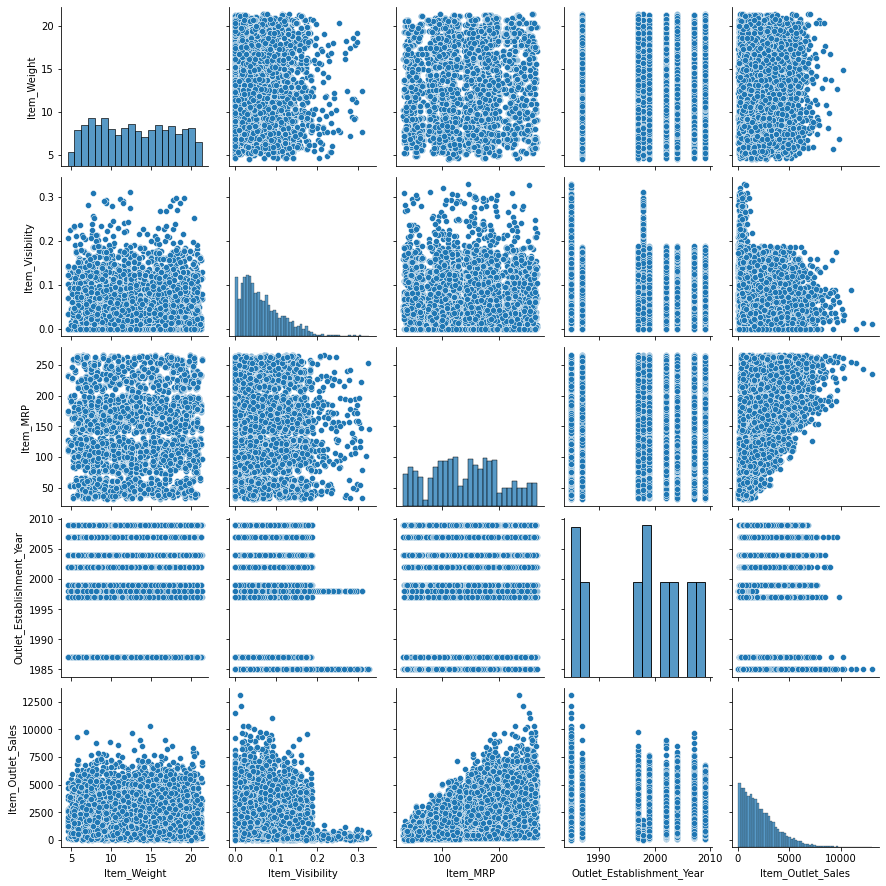

In [19]:
sns.pairplot(num)

<AxesSubplot:xlabel='Outlet_Location_Type'>

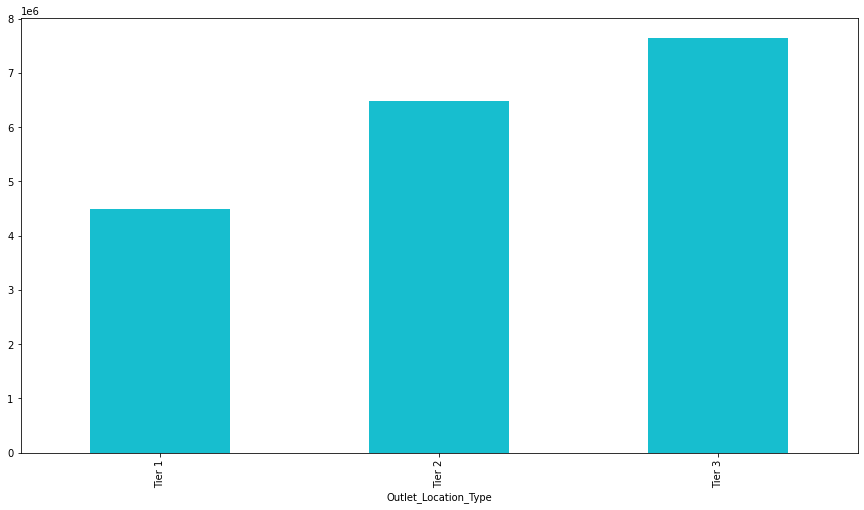

In [20]:
# Item_Outlet_Sales Bar Plot
plt.figure(figsize=(15,8))
train.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum().plot(kind='bar',color='tab:cyan')

Tiier 3 has more sales

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

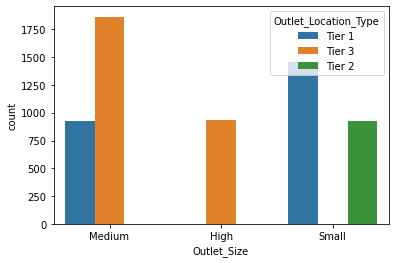

In [21]:
sns.countplot(x='Outlet_Size', data=train, hue='Outlet_Location_Type')

# **Preprocessing**

In [22]:
#Null value
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [23]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [24]:
train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

<AxesSubplot:>

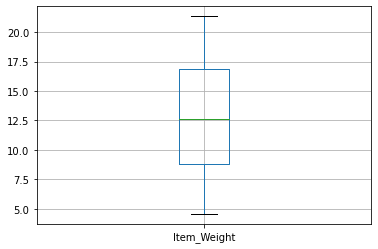

In [25]:
train[['Item_Weight']].boxplot()

In [26]:
train['Item_Weight'].nunique

<bound method IndexOpsMixin.nunique of 0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64>

In [27]:
train.groupby('Item_Type')['Item_Weight'].mean()

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [28]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)

In [29]:
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)

In [30]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

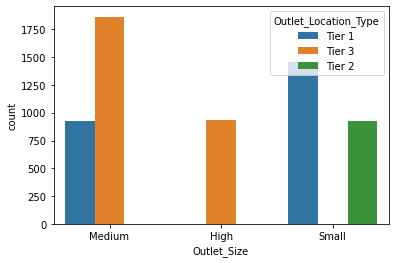

In [31]:
sns.countplot(x='Outlet_Size', data=train, hue='Outlet_Location_Type')

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

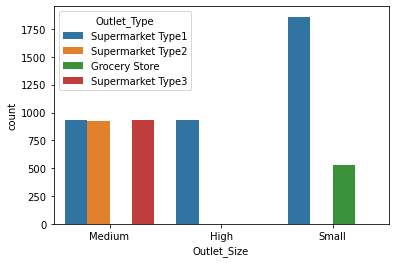

In [32]:
sns.countplot(x='Outlet_Size', data=train, hue='Outlet_Type')

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

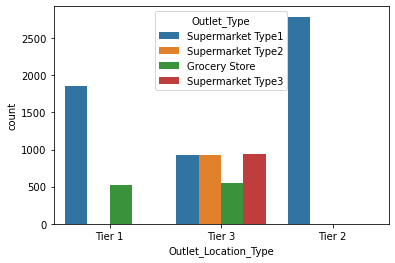

In [33]:
sns.countplot(x='Outlet_Location_Type', data=train, hue='Outlet_Type')

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

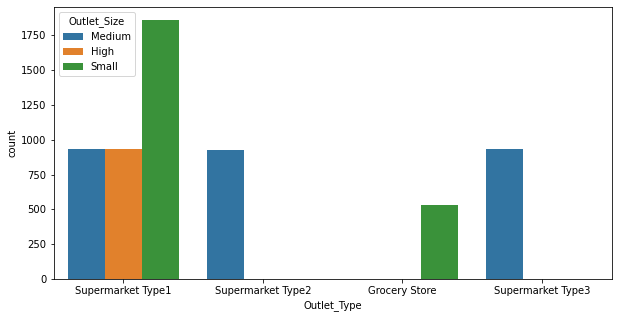

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Type', data=train, hue='Outlet_Size')


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

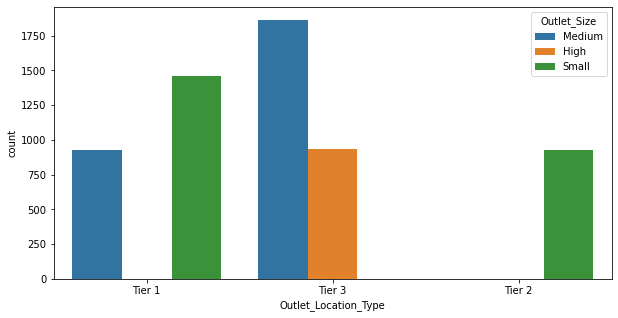

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Location_Type', data=train, hue='Outlet_Size')


Tier 1 and 2 is to be filled with small. tier3 is to be filled with medium

In [36]:
for value in train['Outlet_Location_Type'].unique(): #getting unique valuesand put it in for loop
  filter = train['Outlet_Location_Type'] == value  #filtering out column with true or false values for each 
  mode_value = train[filter]['Outlet_Size'].mode()[0] # Getting the modevalue of Outlet size for the particular Location Type
  train.loc[filter, ['Outlet_Size']] = train.loc[filter, 'Outlet_Size'].fillna(mode_value) #Filling the null values with that mode

In [37]:
for value in test['Outlet_Location_Type'].unique(): #getting unique valuesand put it in for loop
  filter = test['Outlet_Location_Type'] == value  #filtering out column with true or false values for each 
  mode_value = test[filter]['Outlet_Size'].mode()[0] # Getting the modevalue of Outlet size for the particular Location Type
  test.loc[filter, ['Outlet_Size']] = test.loc[filter, 'Outlet_Size'].fillna(mode_value) #Filling the null values with that mode

In [38]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [39]:
test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

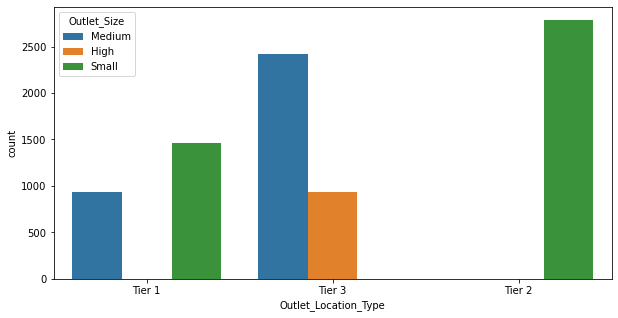

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Location_Type', data=train, hue='Outlet_Size')

In [41]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [42]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [43]:
train['Item_Fat_Content'].replace("LF","Low Fat").value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [44]:
train['Item_Fat_Content'].replace("LF","Low Fat").value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [45]:
train['Item_Fat_Content'].replace("LF","Low Fat",inplace=True)
train['Item_Fat_Content'].replace("low fat", "Low Fat", inplace=True)
train['Item_Fat_Content'].replace("reg", "Regular", inplace=True)

In [46]:
test['Item_Fat_Content'].replace("LF","Low Fat",inplace=True)
test['Item_Fat_Content'].replace("low fat", "Low Fat", inplace=True)
test['Item_Fat_Content'].replace("reg", "Regular", inplace=True)

In [47]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [48]:
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

### **Outlier Detection and Handling**

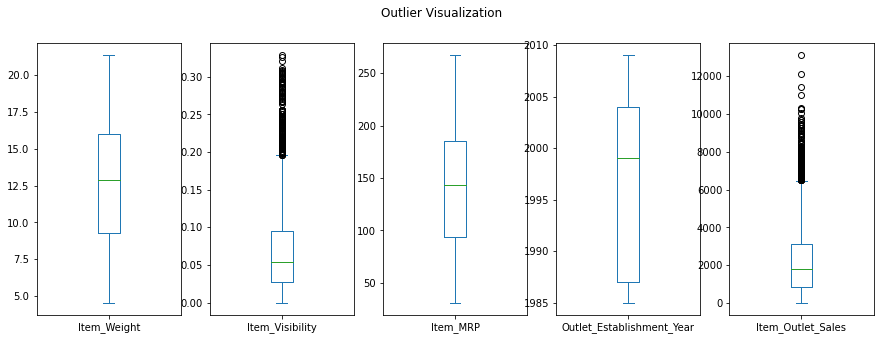

In [49]:
train.plot(kind='box',subplots=True,layout=(1,5),figsize=(15,5),title='Outlier Visualization')
plt.show()

In [50]:
train.groupby('Item_Type')['Item_Outlet_Sales'].mean()

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

In [51]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Item_Visibility has zero values. So log transformation is not possible to handle outliers.

In [52]:
train.groupby('Outlet_Type')['Item_Visibility'].median()

Outlet_Type
Grocery Store        0.090129
Supermarket Type1    0.049865
Supermarket Type2    0.049124
Supermarket Type3    0.048427
Name: Item_Visibility, dtype: float64

In [53]:
#Checking the effect of zero values in Item_Visibility
df1 = train[train['Item_Visibility'] == 0] #saving rows with 0 visibility to another Dataframe df1

In [54]:
df1['Item_Type'].value_counts()

Fruits and Vegetables    87
Snack Foods              68
Household                51
Frozen Foods             51
Baking Goods             45
Dairy                    38
Soft Drinks              34
Health and Hygiene       33
Canned                   33
Meat                     20
Breads                   17
Hard Drinks              17
Starchy Foods            15
Others                   10
Seafood                   4
Breakfast                 3
Name: Item_Type, dtype: int64

In [55]:
df1['Outlet_Type'].value_counts()

Supermarket Type1    342
Supermarket Type2     65
Supermarket Type3     60
Grocery Store         59
Name: Outlet_Type, dtype: int64

In [56]:
df1['Outlet_Location_Type'].value_counts()

Tier 3    213
Tier 2    169
Tier 1    144
Name: Outlet_Location_Type, dtype: int64

In [57]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,526.000000,526.0,526.000000,526.000000,526.000000
mean,12.620681,0.0,138.117157,1997.918251,2222.542928
std,4.212466,0.0,63.372908,8.486795,1741.803049
min,4.590000,0.0,32.890000,1985.000000,33.290000
25%,9.100000,0.0,89.242850,1987.000000,891.339750
50%,12.857645,0.0,130.248100,1999.000000,1774.024100
75%,15.600000,0.0,184.383850,2004.000000,3182.524000
max,21.200000,0.0,264.791000,2009.000000,11445.102000


Since there are many zero values and it doesn't mean that it is not selling. All the other variables are present in them. Going to fill the zeros with the median.

In [58]:
train['Item_Visibility'].replace(0,train['Item_Visibility'].median(),inplace=True)
test['Item_Visibility'].replace(0,test['Item_Visibility'].median(),inplace=True)

In [59]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.069460,140.992782,1997.831867,2181.288914
std,4.226124,0.048893,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.310000,0.033085,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### **Robust scaler**

In [60]:
#saving the train dataset to a variable called df2 to check with robust
train1 = train.copy()

In [61]:
train1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [62]:
from sklearn.preprocessing import RobustScaler, PowerTransformer
robust = RobustScaler()

In [63]:
train1[['Item_Visibility']] = robust.fit_transform(train1[['Item_Visibility']])
train1['Item_Visibility']

0      -0.615995
1      -0.563459
2      -0.604405
3       0.000000
4       0.000000
          ...   
8518    0.046381
8519   -0.112984
8520   -0.304792
8521    1.484387
8522   -0.147198
Name: Item_Visibility, Length: 8523, dtype: float64

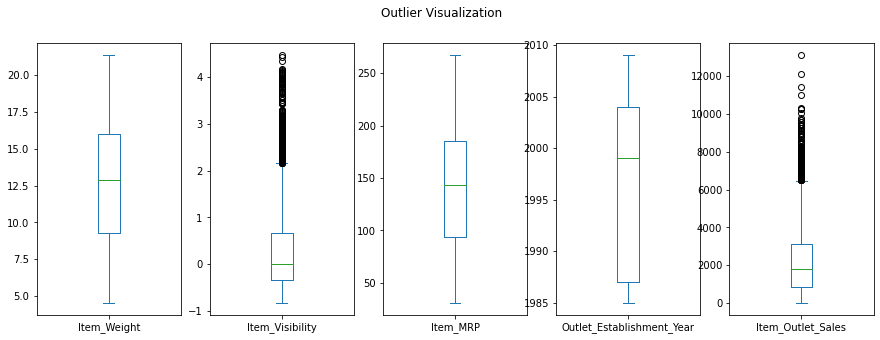

In [64]:
train1.plot(kind='box',subplots=True,layout=(1,5),figsize=(15,5),title='Outlier Visualization')
plt.show()

Robust Scaling seems to have almost no impact on the outliers. Trying with Power Tranformer

#### **Power Transformation**

In [65]:
train2 = train.copy(deep =True)
train2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [66]:
pt = PowerTransformer(method='yeo-johnson')
train2[['Item_Visibility']] = pt.fit_transform(train2[['Item_Visibility']])
train2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,-1.445043,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,-1.310830,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,-1.415012,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,-0.138521,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,-0.138521,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


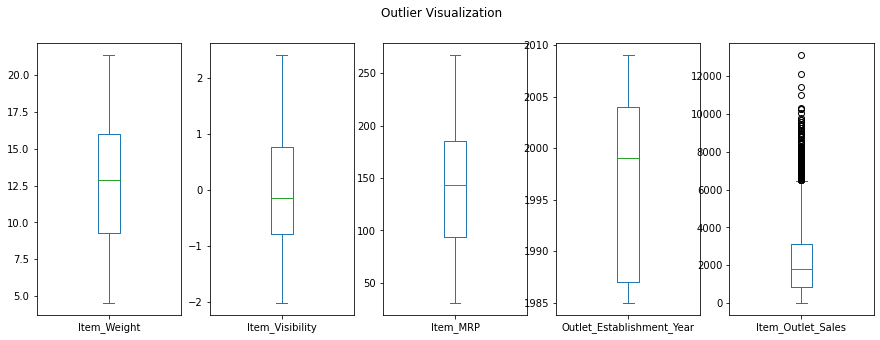

In [67]:
train2.plot(kind='box',subplots=True,layout=(1,5),figsize=(15,5),title='Outlier Visualization')
plt.show()

#### **Log Transformation**

In [68]:
train3 = train.copy(deep =True)
train3['Item_Visibility']=np.log(train3['Item_Visibility'])
train3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,-4.132215,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,-3.948780,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,-4.088756,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,-2.920051,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,-2.920051,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


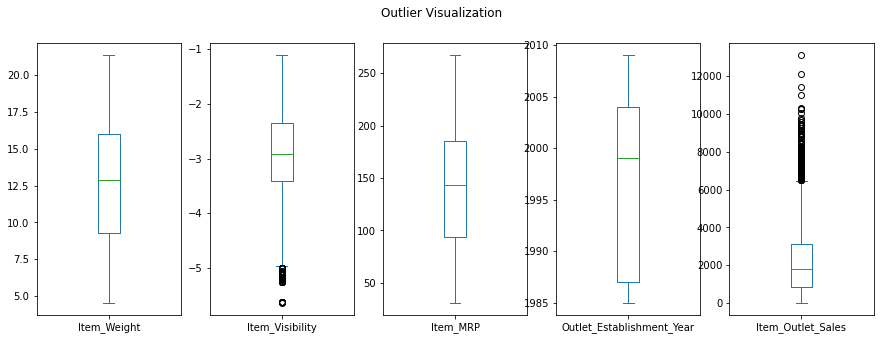

In [69]:
train3.plot(kind='box',subplots=True,layout=(1,5),figsize=(15,5),title='Outlier Visualization')
plt.show()

In [70]:
train3.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,-2.925656,140.992782,1997.831867,2181.288914
std,4.226124,0.763053,62.275067,8.371760,1706.499616
min,4.555000,-5.633875,31.290000,1985.000000,33.290000
25%,9.310000,-3.408665,93.826500,1987.000000,834.247400
50%,12.857645,-2.920051,143.012800,1999.000000,1794.331000
75%,16.000000,-2.358253,185.643700,2004.000000,3101.296400
max,21.350000,-1.113550,266.888400,2009.000000,13086.964800


#### **Cube Root Transformation**

Power transform eliminates outliers. It creates negative values.  So checking with cube roots.

In [71]:
train4 = train.copy(deep=True)
train4['Item_Visibility'] = train4['Item_Visibility']**(1/3)

<AxesSubplot:xlabel='Item_Visibility'>

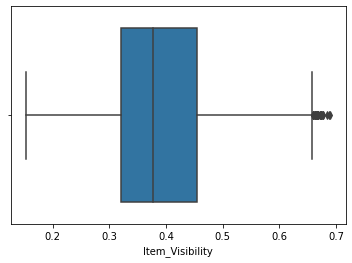

In [72]:
# Checking to see if the cube root of Item_Visibility's range will reduce outliers
sns.boxplot(train4['Item_Visibility'])

#### **Selecting of Transformation**

Cube Root transformation produces less outliers, hence it is selected.

In [73]:
train = train3

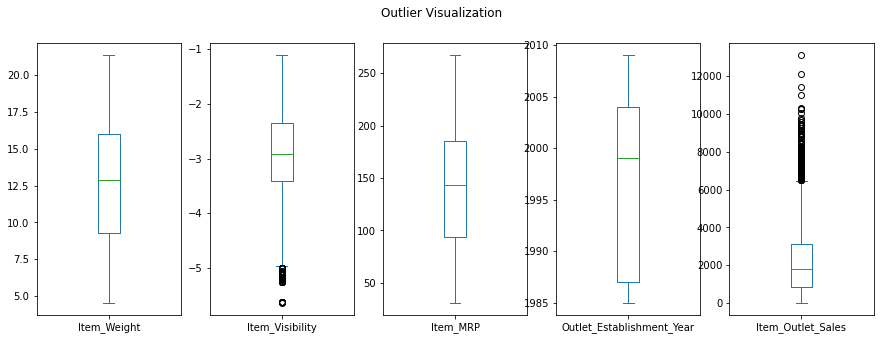

In [74]:
train.plot(kind='box',subplots=True,layout=(1,5),figsize=(15,5),title='Outlier Visualization')
plt.show()

In [75]:
test['Item_Visibility'] = np.log(test['Item_Visibility'])

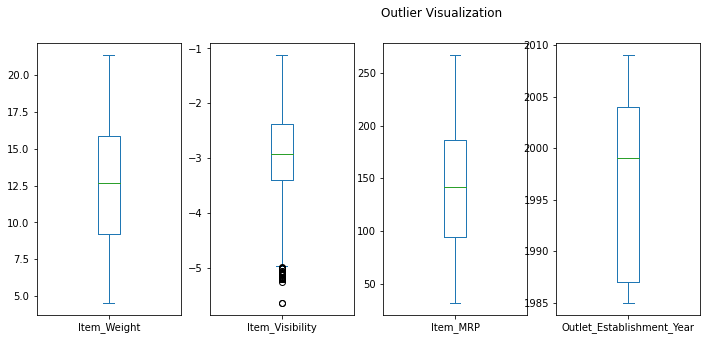

In [76]:
test.plot(kind='box',subplots=True,layout=(1,5),figsize=(15,5),title='Outlier Visualization')
plt.show()

# **Encoding**

In [77]:
train.select_dtypes('object').head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [78]:
train.select_dtypes('object').nunique()

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [80]:
# train dataset
train['Item_Identifier'] = le.fit_transform(train['Item_Identifier'])
train['Outlet_Identifier'] = le.fit_transform(train['Outlet_Identifier'])

# test dataset
test['Item_Identifier'] = le.fit_transform(test['Item_Identifier'])
test['Outlet_Identifier'] = le.fit_transform(test['Outlet_Identifier'])

In [81]:
#train['Item_Fat_Content'].replace(["Low Fat", "Regular"], [1, 2], inplace=True)
train['Outlet_Size'].replace(["Small", "Medium", "High"], [1, 2, 3], inplace=True)
train['Outlet_Location_Type'].replace(["Tier 1", "Tier 2", "Tier 3"], [1, 2, 3], inplace=True)

#test['Item_Fat_Content'].replace(["Low Fat", "Regular"], [1, 2], inplace=True)
test['Outlet_Size'].replace(["Small", "Medium", "High"], [1, 2, 3], inplace=True)
test['Outlet_Location_Type'].replace(["Tier 1", "Tier 2", "Tier 3"], [1, 2, 3], inplace=True)

In [82]:
train = pd.get_dummies(train) 
test = pd.get_dummies(test)

In [83]:
train['Outlet_Age'] = train['Outlet_Establishment_Year'] - (train['Outlet_Establishment_Year'].min()-1)

test['Outlet_Age'] = test['Outlet_Establishment_Year'] - (test['Outlet_Establishment_Year'].min()-1)

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  8523 non-null   int32  
 1   Item_Weight                      8523 non-null   float64
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Identifier                8523 non-null   int32  
 5   Outlet_Establishment_Year        8523 non-null   int64  
 6   Outlet_Size                      8523 non-null   int64  
 7   Outlet_Location_Type             8523 non-null   int64  
 8   Item_Outlet_Sales                8523 non-null   float64
 9   Item_Fat_Content_Low Fat         8523 non-null   uint8  
 10  Item_Fat_Content_Regular         8523 non-null   uint8  
 11  Item_Type_Baking Goods           8523 non-null   uint8  
 12  Item_Type_Breads    

In [85]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  5681 non-null   int32  
 1   Item_Weight                      5681 non-null   float64
 2   Item_Visibility                  5681 non-null   float64
 3   Item_MRP                         5681 non-null   float64
 4   Outlet_Identifier                5681 non-null   int32  
 5   Outlet_Establishment_Year        5681 non-null   int64  
 6   Outlet_Size                      5681 non-null   int64  
 7   Outlet_Location_Type             5681 non-null   int64  
 8   Item_Fat_Content_Low Fat         5681 non-null   uint8  
 9   Item_Fat_Content_Regular         5681 non-null   uint8  
 10  Item_Type_Baking Goods           5681 non-null   uint8  
 11  Item_Type_Breads                 5681 non-null   uint8  
 12  Item_Type_Breakfast 

<AxesSubplot:>

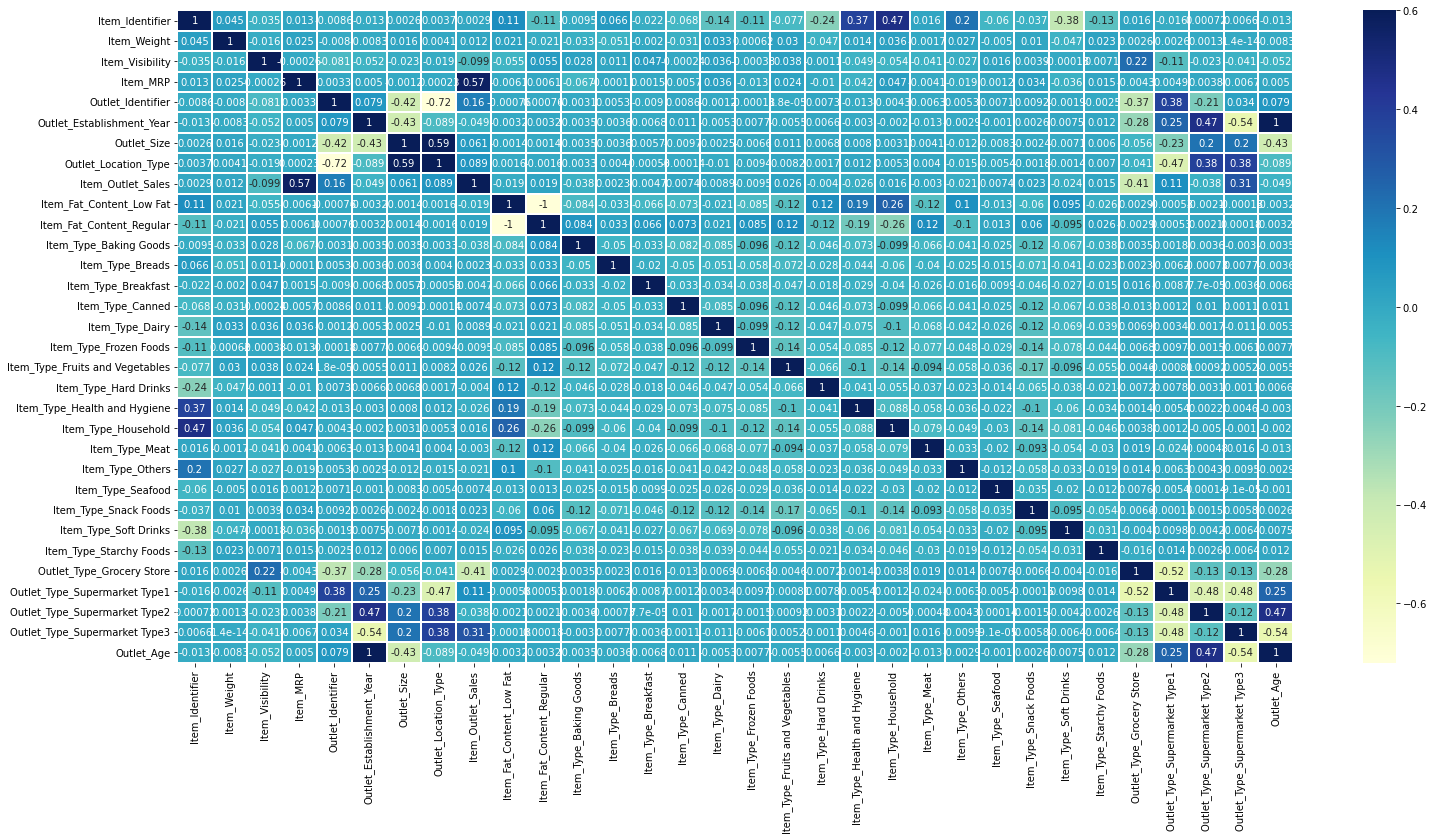

In [86]:
correlation = train.corr()
plt.figure(figsize=(25,12))
sns.heatmap(correlation,cmap="YlGnBu", annot=True, vmin=-0.72, vmax= 0.6,linewidths=0.2)

Found correlation between Outlet_Size and Outlet_Location_Type. Dropping Outlet_Location_Type as they are having less correlation with the output feature.

# **Splitting Train dataset for initial test**

In [87]:
train2 =  train.drop(['Outlet_Establishment_Year'],axis=1)
test2 =  test.drop(['Outlet_Establishment_Year'],axis=1)

In [88]:
X = train2.drop('Item_Outlet_Sales',axis=1)
y = train2.Item_Outlet_Sales.values

In [89]:
y = np.log(train['Item_Outlet_Sales'])

In [90]:
y

0       8.225540
1       6.094524
2       7.648392
3       6.596300
4       6.902446
          ...   
8518    7.929625
8519    6.308617
8520    7.084322
8521    7.520558
8522    6.640751
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [91]:
X.describe()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Age
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,-2.925656,140.992782,4.722281,1.611522,2.112871,0.647307,0.352693,0.076030,...,0.019829,0.007509,0.140795,0.052212,0.017365,0.127068,0.654347,0.108882,0.109703,13.831867
std,449.222377,4.226124,0.763053,62.275067,2.837201,0.675514,0.812757,0.477836,0.477836,0.265061,...,0.139420,0.086334,0.347831,0.222467,0.130634,0.333069,0.475609,0.311509,0.312538,8.371760
min,0.000000,4.555000,-5.633875,31.290000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,395.500000,9.310000,-3.408665,93.826500,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,783.000000,12.857645,-2.920051,143.012800,5.000000,2.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000
75%,1167.000000,16.000000,-2.358253,185.643700,7.000000,2.000000,3.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000
max,1558.000000,21.350000,-1.113550,266.888400,9.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000


## **Scaling**

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [94]:
pd.DataFrame(scaled_X).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,...,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03
mean,5.760186e-17,3.127265e-16,3.512580e-16,-1.644427e-16,-2.622435e-16,3.404267e-16,-7.957445e-16,-1.081930e-15,1.107800e-15,3.707126e-16,...,-2.811836e-16,-3.377075e-16,-5.520764e-16,2.516662e-16,-3.245673e-16,4.379408e-16,-6.617570e-16,9.115539e-16,4.388657e-16,1.060886e-16
std,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,...,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00
min,-1.735801e+00,-1.964716e+00,-3.549396e+00,-1.761688e+00,-1.664513e+00,-9.053223e-01,-1.369334e+00,-1.354743e+00,-7.381472e-01,-2.868549e-01,...,-1.422316e-01,-8.698222e-02,-4.048052e-01,-2.347081e-01,-1.329347e-01,-3.815292e-01,-1.375891e+00,-3.495506e-01,-3.510283e-01,-1.532846e+00
25%,-8.553390e-01,-8.395053e-01,-6.330324e-01,-7.574307e-01,-9.595514e-01,-9.053223e-01,-1.369334e+00,-1.354743e+00,-7.381472e-01,-2.868549e-01,...,-1.422316e-01,-8.698222e-02,-4.048052e-01,-2.347081e-01,-1.329347e-01,-3.815292e-01,-1.375891e+00,-3.495506e-01,-3.510283e-01,-1.293934e+00
50%,7.313312e-03,4.035383e-14,7.345873e-03,3.243893e-02,9.789062e-02,5.751194e-01,-1.388824e-01,7.381472e-01,-7.381472e-01,-2.868549e-01,...,-1.422316e-01,-8.698222e-02,-4.048052e-01,-2.347081e-01,-1.329347e-01,-3.815292e-01,7.268019e-01,-3.495506e-01,-3.510283e-01,1.395408e-01
75%,8.621740e-01,7.435985e-01,7.436391e-01,7.170372e-01,8.028520e-01,5.751194e-01,1.091569e+00,7.381472e-01,1.354743e+00,-2.868549e-01,...,-1.422316e-01,-8.698222e-02,-4.048052e-01,-2.347081e-01,-1.329347e-01,-3.815292e-01,7.268019e-01,-3.495506e-01,-3.510283e-01,7.368218e-01
max,1.732618e+00,2.009608e+00,2.374949e+00,2.021724e+00,1.507813e+00,2.055561e+00,1.091569e+00,7.381472e-01,1.354743e+00,3.486083e+00,...,7.030786e+00,1.149660e+01,2.470324e+00,4.260611e+00,7.522489e+00,2.621031e+00,7.268019e-01,2.860816e+00,2.848773e+00,1.334103e+00


In [95]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

# **Models**

# **1. Linear Regression**

In [96]:
from sklearn.linear_model import LinearRegression

In [146]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train) 
lr_pred = lr_model.predict(X_test)

In [147]:
from sklearn.metrics import mean_squared_error,r2_score

In [148]:
print("MSE      :", mean_squared_error(y_test,lr_pred))
print('R2 Score :',r2_score(lr_pred,y_test))

MSE      : 0.28551805270744185
R2 Score : 0.6181223290151536


# **2. Bagging Regressor**

In [100]:
# importing Bagging Regressor
from sklearn.ensemble import BaggingRegressor
# importing Decision Tree Regressor (using it as base estimator)
from sklearn.tree import DecisionTreeRegressor

In [101]:
# Create instance of DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=16)
# Create instance of Bagging Regressor
bg_reg = BaggingRegressor(base_estimator=dt_reg, n_estimators=500, random_state=42)

# Fitting model
bg_reg.fit(X_train,y_train)
# Predicting model
bg_pred = bg_reg.predict(X_test)

In [102]:
# Error Analysis
print('Mean Squared Error: ', mean_squared_error(bg_pred,y_test))
print('R2 Score          : ', r2_score(bg_pred,y_test))

Mean Squared Error:  0.2925332306126241
R2 Score          :  0.6361154892329337


# **3. Random Forest Regressor**

In [103]:
# importing Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [104]:
#create instance
rf_reg = RandomForestRegressor(random_state=42,max_depth=16,n_estimators=500)

# fitting model
rf_model = rf_reg.fit(X_train,y_train)
# Predicting Model
rf_pred = rf_model.predict(X_test)

In [105]:
# Error Analysis
print('Mean Squared Error: ',mean_squared_error(rf_pred,y_test))
print('R2 Score          : ',r2_score(rf_pred,y_test))

Mean Squared Error:  0.2925530148834659
R2 Score          :  0.6357333186566871


# **4. AdaBoost Regressor**

In [106]:
from sklearn.ensemble import AdaBoostRegressor

In [107]:
#instance creation
abt = AdaBoostRegressor(n_estimators=500,random_state=42)

#model creation
abt_model = abt.fit(X_train,y_train)
#output prediction
abt_pred = abt_model.predict(X_test)

In [108]:
# Error Analysis
print('Mean Squared Error: ',mean_squared_error(abt_pred,y_test))
print('R2 Score          : ',r2_score(abt_pred,y_test))

Mean Squared Error:  0.3328504372036966
R2 Score          :  0.42229795414474236


# **5. Gradient Boost Regressor**

In [109]:
from sklearn.ensemble import GradientBoostingRegressor

In [110]:
#instance creation
gbt = GradientBoostingRegressor(n_estimators=500,max_depth=16,random_state=42)

#model creation
gbt_model = gbt.fit(X_train,y_train)
#output prediction
gbt_pred = gbt_model.predict(X_test)

In [111]:
# Error Analysis
print('Mean Squared Error: ',mean_squared_error(gbt_pred,y_test))
print('R2 Score          : ',r2_score(gbt_pred,y_test))

Mean Squared Error:  0.3788038919071091
R2 Score          :  0.568607991210309


# **Hyperparameter Tuning Using GridSearchCV**

In [112]:
# importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [113]:
#from pprint import pprint
# Look at parameters used by our current forest
#print('Parameters currently in use:\n')
#pprint(rf_reg.get_params())

## **Tuning Random Forest**

In [114]:
X_train 

array([[ 0.71747098, -0.79454422, -0.55161471, ..., -0.34955064,
        -0.35102831,  0.13954076],
       [ 1.20723489,  1.21687316, -0.15980863, ..., -0.34955064,
        -0.35102831,  0.49790936],
       [ 0.86662635,  1.12221822,  0.45901974, ..., -0.34955064,
        -0.35102831, -0.09937163],
       ...,
       [ 1.52335523,  1.12221822, -1.36385118, ..., -0.34955064,
        -0.35102831,  0.49790936],
       [-0.38004542,  1.7729709 ,  0.01779653, ..., -0.34955064,
        -0.35102831,  1.09519035],
       [ 1.41204525,  0.82642155, -1.50625611, ..., -0.34955064,
        -0.35102831, -0.09937163]])

In [117]:
# Define a grid of hyperparameter 'params_rf' 
params_rf = {'n_estimators': list(range(100, 1600, 100)), #[200,300,500],
             'max_depth': list(range(4, 65, 4)),  #[8,12,16],
             'max_features': ['log2', 'sqrt', 'auto']
             }

#Instance creation - we are using RandomForest as the base estimator 
grid_rf = GridSearchCV(estimator=RandomForestRegressor(),                        
                       param_grid=params_rf,                         
                       cv=3,                        
                       #scoring='r2_score',                        
                       verbose=1, 
                       error_score="raise",                       
                       n_jobs=-1) 

#model creation
grid_rf.fit(X_train, y_train)
# output prediction
y_pred = grid_rf.predict(X_test)

# Extract best hyperparameters from 'grid_rf' 
best_hyperparams = grid_rf.best_params_
print('Best hyerparameters:\n', best_hyperparams)

# Extract best CV score from 'grid_rf' 
best_CV_score = grid_rf.best_score_ 
print('Best CV Score: ',best_CV_score)

# Extract best model from 'grid_rf' 
best_model = grid_rf.best_estimator_
print('Best Estimator:\n', best_model)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Best hyerparameters:
 {'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}
Best CV Score:  0.7264204073455888
Best Estimator:
 RandomForestRegressor(max_depth=4, n_estimators=500)


In [118]:
# Using these parameters to tune Random Forest Regressor
#create instance
tuned_rf_reg = best_model #RandomForestRegressor(max_depth=8, max_features='log2', n_estimators=200, random_state=42)

# fitting model
tuned_rf_reg.fit(X_train,y_train)
# Predicting Model
rf1_pred = tuned_rf_reg.predict(X_test)
# Error Analysis
print('Mean Squared Error: ',mean_squared_error(rf1_pred,y_test))
print('R2 Score: ',r2_score(rf1_pred,y_test))

Mean Squared Error:  0.28327539219022546
R2 Score:  0.6248519167913453


## **Tuning Gradient Boost**

In [122]:
# Define a grid of hyperparameter 'params_gb' 
params_gb = {'n_estimators': list(range(100, 1600, 100)), #[200,300,500],
             'max_depth': list(range(4, 65, 4)),  #[8,12,16],
             'max_features': ['log2', 'sqrt']
            }

#Instance creation - we are using GradientBoost as the base estimator 
grid_gb = GridSearchCV(estimator=gbt,                        
                       param_grid=params_gb,                         
                       cv=3,                        
                       #scoring='accuracy',                        
                       verbose=1,                        
                       n_jobs=-1) 
#model creation
grid_gb.fit(X_train,y_train)
# output prediction
y_pred = grid_gb.predict(X_test)

# Extract best hyperparameters from 'grid_gb' 
best_hyperparams = grid_gb.best_params_
print('Best hyerparameters:\n', best_hyperparams)

# Extract best CV score from 'grid_gb' 
best_CV_score = grid_gb.best_score_ 
print('Best CV Score: ',best_CV_score)

# Extract best model from 'grid_gb' 
best_model = grid_gb.best_estimator_
print('Best Estimator:\n',best_model)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Best hyerparameters:
 {'max_depth': 4, 'max_features': 'log2', 'n_estimators': 100}
Best CV Score:  0.7267719514200571
Best Estimator:
 GradientBoostingRegressor(max_depth=4, max_features='log2', random_state=42)


In [123]:
## Using these parameters to tune Gradient Boost Regressor
#instance creation
tuned_gbt = best_model #GradientBoostingRegressor(n_estimators=300,max_depth=8,max_features='log2',random_state=42)
#model creation
tuned_gbt.fit(X_train,y_train)
#output prediction
gbt1_pred = tuned_gbt.predict(X_test)
# Error Analysis
print('Mean Squared Error: ',mean_squared_error(gbt1_pred,y_test))
print('R2 Score: ', r2_score(gbt1_pred,y_test))

Mean Squared Error:  0.27332770497505665
R2 Score:  0.6333118247043379


# **Modeling on Test data**

## **Linear Regression**

In [149]:
lr_test_pred = lr_model.predict(test2)
lr_test_pred

array([6.66938608e+11, 6.43845189e+11, 5.88584988e+11, ...,
       6.34192443e+11, 6.42006713e+11, 6.42006713e+11])

In [136]:
test_pred = lr_test_pred

submission['Item_Outlet_Sales'] = np.exp(test_pred)
submission.to_csv('Linear Regressor.csv',index=False)

## **Bagging Regressor**

In [137]:
bg_test_pred = bg_reg.predict(test2)
bg_test_pred.shape

(5681,)

In [138]:
test_pred = bg_test_pred

submission['Item_Outlet_Sales'] = np.exp(test_pred)
submission.to_csv('Bagging Regressor.csv',index=False)

## **Random Forest Regressor**

In [139]:
rf_test_pred = rf_model.predict(test2)
rf_test_pred.shape

(5681,)

In [140]:
test_pred = rf_test_pred

submission['Item_Outlet_Sales'] = np.exp(test_pred)
submission.to_csv('Random Forest Regressor.csv',index=False)

## **Tuned Random Forest**

In [141]:
tunedrf_test_pred = tuned_rf_reg.predict(test2)
tunedrf_test_pred.shape

(5681,)

In [142]:
test_pred = tunedrf_test_pred

submission['Item_Outlet_Sales'] = np.exp(test_pred)
submission.to_csv('Tuned Random Forest Regressor.csv',index=False)

## **Tuned Gradient Boost Regressor**

In [143]:
gbt_test_pred = tuned_gbt.predict(test2)
gbt_test_pred.shape

(5681,)

In [144]:
test_pred = gbt_test_pred

submission['Item_Outlet_Sales'] = np.exp(test_pred)
submission.to_csv('Tuned Gradient Boost Regressor.csv',index=False)

In [134]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,3673.585044
1,FDW14,OUT017,3019.596745
2,NCN55,OUT010,3530.313112
3,FDQ58,OUT017,3043.218549
4,FDY38,OUT027,3644.210711
